# 1. 주제 선정 이유

최근 코로나 바이러스 감염증-19(COVID-19, 이하 코로나19)의 확진자가 늘어났다가 줄어들었다가를 반복하고 있는 한편, 백신(예방접종) 투약이 이뤄지기 시작하였습니다.

이러한 속도로 보았을 때에, 집단 면역이 이루어질 때가 언제일지 궁금하였습니다.

물론, 일반적인 뉴스에서 찾아보는 정보로는 [11월에 우리나라에서 집단 면역이 이루어질 것](https://www.news1.kr/articles/?4285537)이라 예상하지만, 이를 스스로도 예상해보고 싶어서 이러한 주제를 선정하게 되었습니다.

국가 간의 외교, 바이러스의 변종 등의 요소는 선택한 데이터들에 들어있지 않기에 예상 결과가 일반적인 예상인 11월과는 조금 달라질 것입니다.

하지만 스스로 만들어보는 것에 의의를 두고, 열심히 만들어보겠습니다.

# 2. 주제 정의

공공데이터포털의 [공공데이터활용지원센터_코로나19 예방접종 통계 데이터 조회 서비스](https://www.data.go.kr/data/15077756/openapi.do)와 [보건복지부_코로나19 시·도발생_현황](https://www.data.go.kr/data/15043378/openapi.do) 를 통해 프로그램을 시작할 때마다 데이터를 불러와서, 항상 최신의 데이터를 사용하여 집단 면역이 이루어지는 시기를 예측합니다.

집단 면역의 기준은, [WHO](https://www.who.int/news-room/q-a-detail/herd-immunity-lockdowns-and-covid-19)에 따르면 일반적인 기준은 없고 질병마다 다르다고 하며, 그에 대한 예시로 홍역은 약 95%가 백신을, 소아마비는 약 80%가 백신을 맞아야 집단 면역이 이루어진다고 합니다.

[이 기사](https://www.nytimes.com/2020/12/24/health/herd-immunity-covid-coronavirus.html)를 참고하면, 코로나19의 집단 면역 기준은 바이러스 시작 쯤에 나온 예상 수치인 60~70%는 현 상황에서는 낮으며, 약 85% 이상이 되어야 한다고 전문가들은 주장합니다.

따라서, 아직 코로나19의 집단 면역 기준이 확실하지 않기 때문에, 예상 수치는 70%부터 5%씩 올려서 95%까지 확인해 볼 것입니다.

# 3. 인터넷을 통한 데이터의 획득

In [1]:
debugPrint = False

`requests` 모듈을 사용하여 API로부터 데이터를 가져올 것입니다.<br>

In [2]:
import requests
api_key = "myaCBEk1XX8eSIOiKYJOj5ksB%2BRl%2BxYCJVn2eaWckckSQnQt8gu6lU2HBqSP5Hsx6Gd8uXpXowCPRTjGJ5yDsw%3D%3D"

`datetime` 모듈을 사용하여 어제의 날짜를 구하고, 요청변수의 형식에 맞게 변환합니다.<br>

In [3]:
import datetime

# 2021년 3월 11일부터 가능.
# 백신 API가 위 날짜부터 제공되기 때문에.
startDate = datetime.datetime(2021, 3, 11)
today = datetime.datetime.today()

covid19InfStateRequestStartDate =  startDate.strftime("%Y%m%d")
covid19InfStateRequestEndDate = today.strftime("%Y%m%d")
if debugPrint:
    print(covid19InfStateRequestStartDate, covid19InfStateRequestEndDate)

vaccineStateRequestStartDate = startDate.strftime("%Y-%m-%d") + " 00:00:00"
vaccineStateRequestEndDate = today.strftime("%Y-%m-%d") + " 00:00:00"
if debugPrint:
    print(vaccineStateRequestStartDate, vaccineStateRequestEndDate)

[보건복지부_코로나19 시·도발생_현황](https://www.data.go.kr/data/15043378/openapi.do)에서 데이터를 불러오고 있습니다.<br>
데이터의 형태는 XML이고, 필요없는 데이터도 몇 섞여있기에 가공할 필요가 있습니다.

해당 데이터의 요청변수는 아래와 같습니다.

| 키 이름 | 항목 크기 | 항목 구분 | 항목 설명 | 입력 예시 |
| :- | :-: | :-: | :- | :- |
| serviceKey | 4 | 필수 | 공공 데이터 포털에서 받은 인증키 | - |
| pageNo | 4 | 옵션 | 페이지 번호 | 1 |
| numOfRows | 4 | 옵션 | 한 페이지의 결과 수 | 10 |
| startCreateDt | 30 | 옵션 | 검색할 생성일 범위의 시작| 20210420 |
| endCreateDt | 15 | 옵션 | 검색할 생성일 범위의 종료 | 20210425 |

In [4]:
def loadCovid19InfState(startDate, endDate, pageNo=1, numOfRows=10):
    url = "http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19SidoInfStateJson"
    url = url + "?serviceKey=" + api_key
    
    if pageNo != None:
        url = url + "&pageNo=" + str(pageNo)
    if numOfRows != None:
        url = url + "&numOfRows=" + str(numOfRows)
    if startDate != None:
        url = url + "&startCreateDt=" + str(startDate)
    if endDate != None:
        url = url + "&endCreateDt=" + str(endDate)
    return requests.get(url)

In [5]:
covid19InfStateResponse = loadCovid19InfState(startDate=covid19InfStateRequestStartDate, endDate=covid19InfStateRequestEndDate)
if debugPrint:
    print(covid19InfStateResponse.text)

[공공데이터활용지원센터_코로나19 예방접종 통계 데이터 조회 서비스](https://www.data.go.kr/data/15077756/openapi.do)에서 데이터를 불러오고 있습니다.<br>
데이터의 형태는 JSON 이고, 필요없는 데이터도 몇 섞여있기에 가공할 필요가 있습니다.

현재 해당 API호출에서 `{"code":-4,"msg":"등록되지 않은 인증키 입니다."}` 라는 대답만 돌아오고 있습니다.<br>
여러 방법을 사용해보았으나 문제가 해결되지 않아, 문의 메일을 보내놓고 기다리고 있는 상태입니다.

대답을 받았고, 인코딩 및 디코딩의 문제였습니다. 현재 시점에는 해결되었습니다.

해당 데이터의 요청변수는 아래와 같습니다.

| 키 이름 | 항목 타입 | 항목 구분 | 항목 설명 | 입력 예시 |
| :- | :-: | :-: | :- | :- |
| serviceKey | string | 필수 | 공공 데이터 포털에서 받은 인증키 | - |
| page | int64 | 필수 | 페이지 번호 | 1 |
| perPage | int64 | 필수 | 한 페이지의 결과 수 | 10 |
| returnType | string | 선택 | 응답의 데이터 타입 (JSON or XML) (기본값 : JSON) | JSON |
| cond[baseDate::EQ] | string | 선택 | 요청 일자와 같은 일자의 통계를 가져옴 | 2021-04-25 00:00:00 |
| cond[baseDate::LT]] | string | 선택 | 요청 일자 이전의 통계를 가져옴 | 2021-04-25 00:00:00 |
| cond[baseDate::LTE] | string | 선택 | 요청 일자 이전이거나 같은 일자의 통계를 가져옴 | 2021-04-25 00:00:00 |
| cond[baseDate::GT] | string | 선택 | 요청 일자 이후의 통계를 가져옴 | 2021-04-25 00:00:00 |
| cond[baseDate::GTE] | string | 선택 | 요청 일자 이후거나 같은 일자의 통계를 가져옴 | 2021-04-25 00:00:00 |
| cond[sido::EQ] | string | 선택 | 지역명칭(시도명) | 서울특별시 |

In [6]:
class DateQueryConditionType:
    EQUAL = 1 # 같을 때
    BEFORE = 2 # 이전
    BEFORE_EQUAL = 3 # 이전이거나 같을 때
    AFTER = 4 # 이후
    AFTER_EQUAL = 5 # 이후거나 같을 때
    
    @classmethod
    def toString(cls, condType):
        '''
        int -> string
        쿼리 사용을 위해 조건 값을 문자열로 변환한다.
        '''
        if condType == cls.EQUAL:
            return "cond[baseDate::EQ]"
        elif condType == cls.BEFORE:
            return "cond[baseDate::LT]"
        elif condType == cls.BEFORE_EQUAL:
            return "cond[baseDate::LTE]"
        elif condType == cls.AFTER:
            return "cond[baseDate::GT]"
        elif condType == cls.AFTER_EQUAL:
            return "cond[baseDate::GTE]"
        return "UNDEFINED"

class VaccineDateQueryCondition:
    def __init__(self, date, condType):
        self.date = date
        self.condType = condType

def loadVaccineState(page=1, perPage=10, dateConds=[], sido="전국"):
    if not type(dateConds) is list:
        print('Error: dateConds 가 리스트가 아닙니다.')
        return None
    
    url = "https://api.odcloud.kr/api/15077756/v1/vaccine-stat?"
    url = url + f"serviceKey={api_key}&page={page}&perPage={perPage}" # 기본 쿼리 데이터 추가
    
    for dateCond in dateConds: # 날짜 쿼리 데이터 추가
        condStr = DateQueryConditionType.toString(dateCond.condType)
        url = url + f"&{condStr}={dateCond.date}"
    
    if sido != None: # 시도 쿼리 데이터 추가
        url = url + f"&cond[sido::EQ]={sido}"
    return requests.get(url)

In [7]:
dateConds = []
dateConds.append(VaccineDateQueryCondition(vaccineStateRequestStartDate, DateQueryConditionType.AFTER_EQUAL))
dateConds.append(VaccineDateQueryCondition(vaccineStateRequestEndDate, DateQueryConditionType.BEFORE_EQUAL))
vaccineStateResponse = loadVaccineState(dateConds=dateConds, perPage=100)
if debugPrint:
    print(vaccineStateResponse.text)

# 4. 분석을 위한 데이터의 가공

위에서 기술했듯이, 각 데이터에는 분석에 필요하지 않은 데이터가 있습니다.<br>
파이썬에서 쓰기 편하게 각 항목을 클래스를 이용하여 하나로 묶으면서 필요하지 않은 데이터를 버리도록 하겠습니다.

[보건복지부_코로나19 시·도발생_현황](https://www.data.go.kr/data/15043378/openapi.do)에서는 아이디 값, 기준일시, 총 확진자 수, 격리 중인 총 환자 수, 격리 해제된 총 환자 수, 총 사망자 수, 당일 지역발생 수를 하나의 클래스로 묶었습니다.

[공공데이터활용지원센터_코로나19 예방접종 통계 데이터 조회 서비스](https://www.data.go.kr/data/15077756/openapi.do)에서는 아이디 값, 기준일시, 당일 1차 접종자 수, 당일 2차 접종자 수, 총합 1차 접종자 수, 총합 2차 접종자 수를 하나의 클래스로 묶었습니다.

In [8]:
class Covid19InfState:
    def __init__(self, baseDate, infections, isolations, released, death, local_occur):
        self.baseDate = baseDate # 기준일시
        self.infections = int(infections) # 총 확진자 수
        self.isolations = int(isolations) # 격리 중인 총 환자 수
        self.released = int(released) # 격리 해제된 총 환자 수
        self.death = int(death) # 총 사망자 수
        self.local_occur = int(local_occur) # 당일 지역발생 수
    
    def __str__(self):
        return f'{{baseDate={self.baseDate}, infections={self.infections}, isolations={self.isolations}, released={self.released}, death={self.death}, local_occur={self.local_occur}}}'

class VaccineState:
    def __init__(self, baseDate, totalPrimaryVaccination, totalSecondaryVaccination):
        self.baseDate = baseDate # 기준일시
        self.totalPrimaryVaccination = int(totalPrimaryVaccination) # 총합 1차 접종자 수
        self.totalSecondaryVaccination = int(totalSecondaryVaccination) # 총합 2차 접종자 수
    
    def __str__(self):
        return f'{{baseDate={self.baseDate}, totalPV={self.totalPrimaryVaccination}, totalSV={self.totalSecondaryVaccination}}}'
    

코로나19 발생 현황 데이터를 위에서 만든 `Covid19InfState` 클래스에 맞춰서 넣기 위해 XML을 파싱하고, 객체를 생성하여 리스트에 넣습니다.

In [9]:
import xml.etree.ElementTree as elemTree

covid19InfStateList = []

tree = elemTree.fromstring(covid19InfStateResponse.text) # XML
items = tree.find('./body/items')

for item in items.findall('item'):
    gubun = item.find('gubun').text
    if gubun == '합계':
        baseDate = item.find('stdDay').text
        infections = item.find('defCnt').text
        isolations = item.find('isolIngCnt').text
        released = item.find('isolClearCnt').text
        death = item.find('deathCnt').text
        local_occur = item.find('localOccCnt').text
        
        newCovid19InfState = Covid19InfState(baseDate, infections, isolations, released, death, local_occur)
        if debugPrint:
            print(newCovid19InfState)
        
        covid19InfStateList.insert(0, newCovid19InfState)

코로나19 예방접종 현황 데이터를 위에서 만든 `VaccineState` 클래스에 맞춰서 넣기 위해 JSON을 파싱하고, 객체를 생성하여 리스트에 넣습니다.

In [10]:
import json

vaccineStateList = []

jsonObject = json.loads(vaccineStateResponse.text) # JSON
dataList = jsonObject.get("data")

for idx, data in enumerate(dataList):
    baseDate = data.get("baseDate")
    totalPV = data.get("totalFirstCnt")
    totalSV = data.get("totalSecondCnt")
    
    newVaccineState = VaccineState(baseDate, totalPV, totalSV)
    if debugPrint:
        print(newVaccineState)
    
    vaccineStateList.append(newVaccineState)

데이터 분석을 더 쉽게 하기 위해 `Pandas`를 사용합니다.

In [11]:
import pandas as pd

In [12]:
covid19InfStateDict = dict()

covid19InfStateDict['BaseDate'] = []
covid19InfStateDict['Infections'] = []
covid19InfStateDict['Isolations'] = []
covid19InfStateDict['Released'] = []
covid19InfStateDict['Death'] = []
covid19InfStateDict['Local_Occur'] = []

for state in covid19InfStateList:
    rawDate = state.baseDate
    formattedDate = rawDate[0:4] + rawDate[6:8] + rawDate[10:12]
    
    covid19InfStateDict['BaseDate'].append(formattedDate)
    covid19InfStateDict['Infections'].append(state.infections)
    covid19InfStateDict['Isolations'].append(state.isolations)
    covid19InfStateDict['Released'].append(state.released)
    covid19InfStateDict['Death'].append(state.death)
    covid19InfStateDict['Local_Occur'].append(state.local_occur)

covid19InfStateDataFrame = pd.DataFrame(covid19InfStateDict)

if debugPrint:
    print(covid19InfStateDataFrame)

In [13]:
vaccineStateDict = dict()

vaccineStateDict['BaseDate'] = []
vaccineStateDict['TotalPV'] = []
vaccineStateDict['TotalSV'] = []

for state in vaccineStateList:
    rawDate = state.baseDate
    formattedDate = rawDate[0:4] + rawDate[5:7] + rawDate[8:10]
    
    vaccineStateDict['BaseDate'].append(formattedDate)
    vaccineStateDict['TotalPV'].append(state.totalPrimaryVaccination)
    vaccineStateDict['TotalSV'].append(state.totalSecondaryVaccination)

vaccineStateDataFrame = pd.DataFrame(vaccineStateDict)

if debugPrint:
    print(vaccineStateDataFrame)

만들어진 `DataFrame`의 정보입니다.

In [14]:
covid19InfStateDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   BaseDate     88 non-null     object
 1   Infections   88 non-null     int64 
 2   Isolations   88 non-null     int64 
 3   Released     88 non-null     int64 
 4   Death        88 non-null     int64 
 5   Local_Occur  88 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 4.2+ KB


In [15]:
vaccineStateDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   BaseDate  88 non-null     object
 1   TotalPV   88 non-null     int64 
 2   TotalSV   88 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 2.2+ KB


하나의 `DataFrame`으로 만듭니다.

In [16]:
infoDF = pd.merge(covid19InfStateDataFrame, vaccineStateDataFrame, on='BaseDate')
infoDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88 entries, 0 to 87
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   BaseDate     88 non-null     object
 1   Infections   88 non-null     int64 
 2   Isolations   88 non-null     int64 
 3   Released     88 non-null     int64 
 4   Death        88 non-null     int64 
 5   Local_Occur  88 non-null     int64 
 6   TotalPV      88 non-null     int64 
 7   TotalSV      88 non-null     int64 
dtypes: int64(7), object(1)
memory usage: 6.2+ KB


`BaseDate`열의 타입이 `object`입니다.<br>
타입이 `object`일 때는 제대로 처리되지 않습니닫. 이를 처리할 수 있도록, 날짜 타입인 `datetime`으로 변환해줍니다.

In [17]:
infoDF['BaseDate'] = pd.to_datetime(infoDF['BaseDate'], format="%Y%m%d")
infoDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88 entries, 0 to 87
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   BaseDate     88 non-null     datetime64[ns]
 1   Infections   88 non-null     int64         
 2   Isolations   88 non-null     int64         
 3   Released     88 non-null     int64         
 4   Death        88 non-null     int64         
 5   Local_Occur  88 non-null     int64         
 6   TotalPV      88 non-null     int64         
 7   TotalSV      88 non-null     int64         
dtypes: datetime64[ns](1), int64(7)
memory usage: 6.2 KB


In [18]:
infoDF

,BaseDate,Infections,Isolations,Released,Death,Local_Occur,TotalPV,TotalSV
0,2021-03-11,94198,7871,84675,1652,444,500635,0
1,2021-03-12,94686,7281,85743,1662,467,546277,0
2,2021-03-13,95176,6884,86625,1667,474,583658,0
3,2021-03-14,95635,6558,87408,1669,436,587884,0
4,2021-03-15,96011,6582,87754,1675,367,588958,0
...,...,...,...,...,...,...,...,...
83,2021-06-02,141476,7443,132068,1965,654,6358512,2198010
84,2021-06-03,142157,7490,132699,1968,672,6741993,2220728
85,2021-06-04,142852,7594,133289,1969,674,7086292,2247008
86,2021-06-05,143596,7862,133763,1971,725,7455726,2277137


<AxesSubplot:>

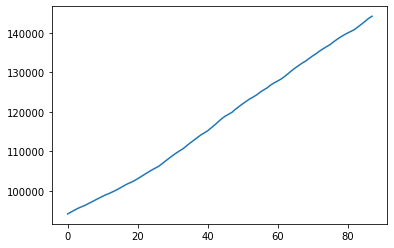

In [19]:
infoDF['Infections'].plot()

# 5. 분석 결과 도출

어느 날짜까지 예측할지 결정합니다.

In [20]:
today = datetime.datetime.today()
predictDays = 730 # 오늘로부터 2년 후까지 예측

아래부터 각 항목에 대한 예측을 합니다.

격리 중인 총 환자 수와 당일 지역발생 수는 다음의 이유로 제외합니다.
- 누적형 데이터가 아님
- 격리 중인 총 환자 수는 백신 접종과 거의 무관하다 판단
- 당일 지역발생 수는 총 확진자 수로 거의 대체 가능하다 판단

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression      # 선형 회귀 분석
from sklearn.preprocessing import PolynomialFeatures   # 다항식 변환

In [22]:
def predict(yRowName):
  X=infoDF[['BaseDate']]  # 독립 변수 X
  y=infoDF[yRowName]  # 종속 변수 Y

  poly = PolynomialFeatures(degree=4)
  X = poly.fit_transform(X)

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

  pr = LinearRegression()
  pr.fit(X_train, y_train)

  target = []
  
  cursor = today
  for i in range(predictDays):
    cursor = cursor + datetime.timedelta(days=1)
    target.append(cursor.strftime("%Y-%m-%d"))
  
  targetDict = dict()
  targetDict['BaseDate'] = target

  targetDF = pd.DataFrame(targetDict)
  targetDF['BaseDate'] = pd.to_datetime(targetDF['BaseDate'], format="%Y-%m-%d")

  targetDFPoly = poly.fit_transform(targetDF)

  return pr.predict(targetDFPoly)

In [23]:
infResult = predict('Infections')
relResut = predict('Released')
deaResult = predict('Death')
pvResult = predict('TotalPV')
svResult = predict('TotalSV')

In [24]:
infResult

array([144517.43766563, 145117.34617924, 145717.35050193, 146317.45064388,
       146917.64661532, 147517.93842643, 148118.32608741, 148718.80960848,
       149319.38899983, 149920.06427167, 150520.8354342 , 151121.70249762,
       151722.66547214, 152323.72436798, 152924.87919532, 153526.12996438,
       154127.47668537, 154728.9193685 , 155330.45802397, 155932.09266199,
       156533.82329278, 157135.64992654, 157737.57257348, 158339.59124381,
       158941.70594775, 159543.91669551, 160146.2234973 , 160748.62636333,
       161351.12530382, 161953.72032898, 162556.41144903, 163159.19867419,
       163762.08201466, 164365.06148067, 164968.13708243, 165571.30883016,
       166174.57673408, 166777.94080441, 167381.40105137, 167984.95748517,
       168588.61011604, 169192.3589542 , 169796.20400986, 170400.14529326,
       171004.18281461, 171608.31658414, 172212.54661208, 172816.87290863,
       173421.29548404, 174025.81434852, 174630.42951231, 175235.14098562,
       175839.94877868, 1

# 6. 결론

2021년 기준 한국의 인구는 [51,821,669명](https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1BPA002&checkFlag=N)입니다. 이를 통해 1차 백신을 맞은 사람의 비율을 구하겠습니다.

In [25]:
population = 51821669
targetProportions = [0.7, 0.75, 0.8, 0.85, 0.9, 0.95]
resultIndex = []
findTarget = 0

for idx, val in enumerate(pvResult):
    if val >= population:
        break
    if val / population > targetProportions[findTarget]:
        findTarget = findTarget + 1
        resultIndex.append(idx)
    if findTarget == len(targetProportions):
        break

today = datetime.datetime.now()
for i in range(len(resultIndex)):
    tmpDate = today + datetime.timedelta(days=resultIndex[i] + 1)
    print('인구의 %d%% 백신 접종 완료 시기 : %s' % (int(targetProportions[i] * 100), tmpDate.strftime("%Y-%m-%d")))

인구의 70% 백신 접종 완료 시기 : 2022-08-12
인구의 75% 백신 접종 완료 시기 : 2022-09-16
인구의 80% 백신 접종 완료 시기 : 2022-10-21
인구의 85% 백신 접종 완료 시기 : 2022-11-25
인구의 90% 백신 접종 완료 시기 : 2022-12-29
인구의 95% 백신 접종 완료 시기 : 2023-02-01


# 7. 참고문헌

### 데이터 출처

- 코로나19 발생 현황 : https://www.data.go.kr/data/15043378/openapi.do
- 코로나19 예방접종 현황 : https://www.data.go.kr/data/15077756/openapi.do

### 데이터 불러오기

- datetime module : https://docs.python.org/ko/3/library/datetime.html
    - 당일을 기준으로 최신 데이터를 불러오기 위해 사용

### 데이터 가공

- XML Parsing : https://docs.python.org/3/library/xml.etree.elementtree.html
- JSON Parsing : https://docs.python.org/3/library/json.html

### 데이터 분석

- 파이썬 머신러닝 판다스 데이터 분석 : https://book.naver.com/bookdb/book_detail.nhn?bid=15028524
- ARIMA 모델 : https://byeongkijeong.github.io/ARIMA-with-Python/

# 8. 별첨: 획득한 데이터 원본

실행할 때 마다 불러오기 때문에 특정한 데이터 원본이 존재하지 않습니다.

# 9. 별첨: 가공된 데이터 원본

위에서 기술했듯이, 실행할 때 마다 데이터를 불러와서 가공을 하기 때문에 특정한 가공 데이터 원본이 존재하지 않습니다.

# 10. 변환 작업을 위한 파이썬 코드 원본

위의 4번에서 처리하였습니다.